Epoch 1/10
141/141 [==============================] - 10s 38ms/step - loss: 0.0088
Epoch 2/10
141/141 [==============================] - 4s 31ms/step - loss: 0.0051
Epoch 3/10
141/141 [==============================] - 5s 39ms/step - loss: 0.0038
Epoch 4/10
141/141 [==============================] - 5s 37ms/step - loss: 0.0039
Epoch 5/10
141/141 [==============================] - 4s 30ms/step - loss: 0.0038
Epoch 6/10
141/141 [==============================] - 5s 38ms/step - loss: 0.0031
Epoch 7/10
141/141 [==============================] - 5s 36ms/step - loss: 0.0029
Epoch 8/10
141/141 [==============================] - 4s 30ms/step - loss: 0.0027
Epoch 9/10
141/141 [==============================] - 5s 37ms/step - loss: 0.0026
Epoch 10/10
2/2 [==============================] - 1s 17ms/step
Root Mean Squared Error (RMSE): 0.29921304981984775
Prediction Accuracy: 92.0


<ipython-input-7-bb71c828ee23>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


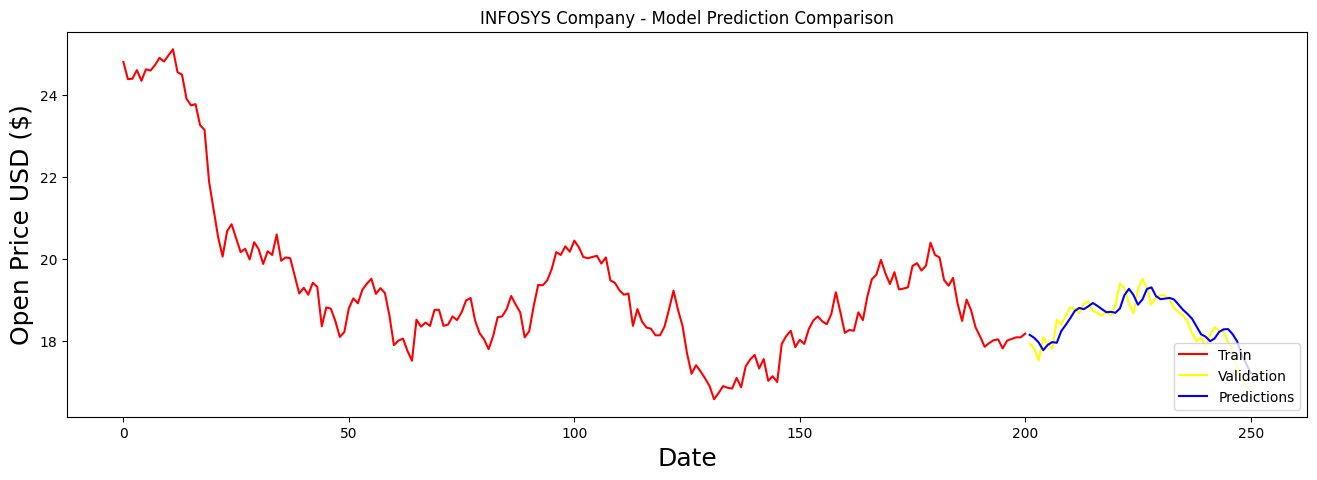

1/1 [==============================] - 0s 30ms/step
Opening Price of /content/drive/MyDrive/Project1/INFY.csv Next day: [[17.06017]]


In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the stock data
ticker = '/content/drive/MyDrive/Project1/INFY.csv'
df = pd.read_csv(ticker)

# Set the random seed for reproducibility
np.random.seed(42)

# Prepare the data
data = df.filter(['Open'])
dataset = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Define the training data length
training_data_len = math.ceil(len(dataset) * 0.8)

# Create the training dataset
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Increase the number of epochs
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Create the test dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE and accuracy
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
threshold = 0.03
accuracy = np.mean(np.abs((y_test - predictions) / y_test) <= threshold)
print("Root Mean Squared Error (RMSE):", rmse)
print("Prediction Accuracy:", accuracy * 100)

# Plot the predictions
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16, 5))
plt.title('INFOSYS Company - Model Prediction Comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'], color='red')
plt.plot(valid['Open'], color='yellow')
plt.plot(valid['predictions'], color='blue')
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()
valid.tail(15)

# Predict the opening price for tomorrow
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(f"Opening Price of {ticker} Next day: {pred_price}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
